In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%matplotlib inline


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


from sklearn.decomposition import PCA
from scipy.stats import zscore

# Read the dataset
#dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
dataset = pd.read_csv("/content/drive/MyDrive/0.Latest_DS_Course/USL/PCA/Data/wine.data", header=None)


# Add columns,Descriptive analytics
print("Shape of the dataset: ", dataset.shape)
dataset.columns = ['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_ash',
                  'magnesium', 'total_phenol', 'flavanoids', 'nonflavanoid_phenols',
                  'proanthocyanins', 'color_intensity', 'hue', 'diluted_wines',
                  'proline']


# Check the imported dataset
dataset.tail(5)

Shape of the dataset:  (178, 14)


,class,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenol,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [3]:
dataset.dtypes


,0
class,int64
alcohol,float64
malic_acid,float64
ash,float64
alcalinity_ash,float64
magnesium,int64
total_phenol,float64
flavanoids,float64
nonflavanoid_phenols,float64
proanthocyanins,float64


In [4]:
dataset.isnull().sum()

,0
class,0
alcohol,0
malic_acid,0
ash,0
alcalinity_ash,0
magnesium,0
total_phenol,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0


In [5]:
sns.pairplot(dataset, diag_kind='kde')

Output hidden; open in https://colab.research.google.com to view.

In [6]:
# scale the dimensions of the data

from sklearn.model_selection import train_test_split


X,y = dataset.iloc[:, 1:].values , dataset.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5 , random_state=0)

sc = StandardScaler()


X_train_std = sc.fit_transform(X_train)  # scale training and test data independently to prevent data leaks
X_test_std = sc.fit_transform(X_test)

In [7]:
cov_matrix = np.cov(X_train_std.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.01136364  0.09092243  0.23002965 -0.43456922  0.29455589  0.45837286
   0.38059976 -0.2726185   0.2360211   0.58877151 -0.10580909  0.14468819
   0.66826692]
 [ 0.09092243  1.01136364  0.23018263  0.32706141 -0.10721153 -0.2895531
  -0.46834013  0.36792642 -0.33122663  0.29902729 -0.50657874 -0.4199617
  -0.21781971]
 [ 0.23002965  0.23018263  1.01136364  0.37478824  0.1291202   0.14278277
   0.01431417  0.22911458 -0.12432642  0.23659743 -0.20606272 -0.08492684
   0.1637024 ]
 [-0.43456922  0.32706141  0.37478824  1.01136364 -0.2543752  -0.53580856
  -0.58302975  0.49693242 -0.47556456 -0.05476143 -0.35063939 -0.45396691
  -0.59783238]
 [ 0.29455589 -0.10721153  0.1291202  -0.2543752   1.01136364  0.20341901
   0.18126552 -0.33981969  0.26697194  0.21002936 -0.0338927   0.02106938
   0.28700071]
 [ 0.45837286 -0.2895531   0.14278277 -0.53580856  0.20341901  1.01136364
   0.88220427 -0.40039966  0.59528898  0.02414881  0.43388565  0.70517106
   0.64234584]
 [

In [8]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.20002631 -0.46794146  0.00212495 -0.20316223 -0.06990281 -0.0134876
   0.14597642  0.04588521 -0.23425745 -0.0658249   0.76075935  0.14145813
   0.11525323]
 [ 0.2329795  -0.26225077 -0.14557697 -0.25751256  0.48462043 -0.60519698
   0.28405894 -0.09020087  0.01786169 -0.24683236 -0.18356659 -0.0447746
  -0.05046757]
 [ 0.04692711 -0.28833041 -0.66367043  0.35448438 -0.2117194   0.01274513
   0.063891    0.0422141   0.30309342 -0.03019734 -0.11060458  0.22351192
   0.37779058]
 [ 0.32807073  0.05668305 -0.36806112  0.26394769 -0.10093689 -0.06347755
  -0.36082809  0.01567275 -0.36814497 -0.3328708   0.22587752 -0.35177139
  -0.34389185]
 [-0.13622759 -0.23921822  0.24630896  0.7705621   0.30717427  0.00774383
   0.29399477 -0.08840424 -0.03032983  0.1502596   0.05553383 -0.11786618
  -0.20160385]
 [-0.37498067 -0.08570422 -0.2793191  -0.07056167  0.03897472 -0.12771473
  -0.06526287  0.50899354 -0.2182424   0.2908877  -0.20554893  0.27506973
  -0.48756877]
 [-0.4

In [9]:
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,5.220953,2.605789,1.292517,0.941104,0.674101,0.626949,0.497529,0.076423,0.164923,0.324875,0.278395,0.205412,0.238757


In [10]:
print(eig_vecs[1])

[ 0.2329795  -0.26225077 -0.14557697 -0.25751256  0.48462043 -0.60519698
  0.28405894 -0.09020087  0.01786169 -0.24683236 -0.18356659 -0.0447746
 -0.05046757]


In [11]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 39.70992803  59.52924209  69.35997096  76.51789046  81.64502011
  86.41351615  90.19765908  92.66861806  94.78605624  96.6020127
  98.16434829  99.4187328  100.        ]


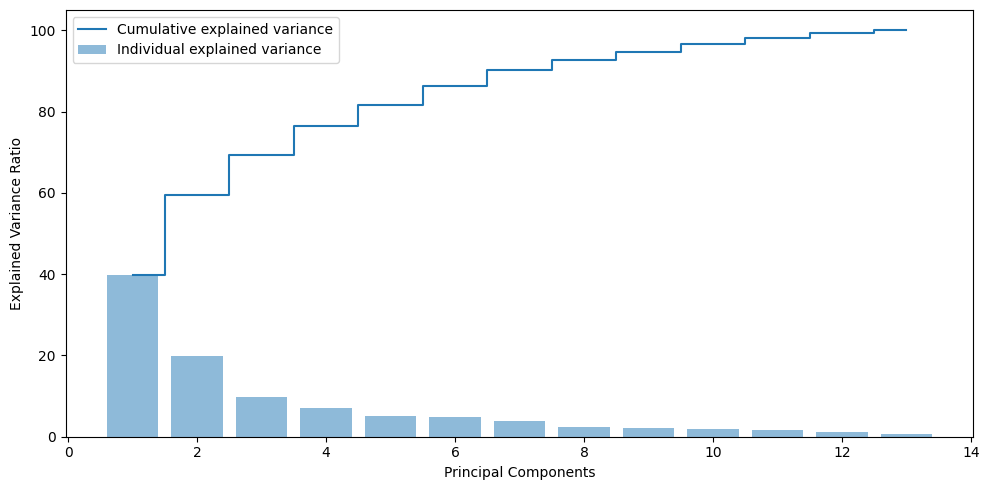

In [12]:
# Ploting
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [13]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
#eig_pairs = [(eig_vals[index], eig_vecs[:,index]) for index in range(len(eig_vals))]
eig_pairs = [(eig_vals[index], eig_vecs[index]) for index in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort(reverse=True)


# Note: always form pair of eigen vector and values  first before sorting...

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eig_vals))]





In [14]:
eig_pairs[0]

(np.float64(5.220953037500925),
 array([-0.20002631, -0.46794146,  0.00212495, -0.20316223, -0.06990281,
        -0.0134876 ,  0.14597642,  0.04588521, -0.23425745, -0.0658249 ,
         0.76075935,  0.14145813,  0.11525323]))

In [15]:
print(eigvalues_sorted[0])
print(eigvectors_sorted[0])

5.220953037500925
[-0.20002631 -0.46794146  0.00212495 -0.20316223 -0.06990281 -0.0134876
  0.14597642  0.04588521 -0.23425745 -0.0658249   0.76075935  0.14145813
  0.11525323]


In [16]:
# Dimesionality reduction

P_reduce = np.array(eigvectors_sorted[0:10]).transpose()   # Selecting first few eigen vectors of all 14

Proj_train_data = np.dot(X_train_std,P_reduce)   # projecting training data onto the eight eigen vectors

Proj_test_data = np.dot(X_test_std,P_reduce)    # projecting test data onto the eight eigen vectors

In [17]:
# complete matrix operation
print(y_train.shape)
X_train_std.shape, P_reduce.shape, Proj_train_data.shape

(89,)


((89, 13), (13, 10), (89, 10))

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(Proj_train_data, y_train)

result = model.score(Proj_test_data, y_test)
print(result)

0.9550561797752809


# Compare logistic regression on original standardized data

In [19]:
# Logistic Regression on original dimension data

model.fit(X_train_std, y_train)

model.score(X_test_std, y_test)


0.9325842696629213

In [20]:
#

## PCA

In [21]:
X.shape

(178, 13)

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the data (very important before PCA!)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)


# Apply PCA to reduce dimensions, keeping 95% of the explained variance
pca = PCA(0.99)
X_pca = pca.fit_transform(scaled_data)  # Fit PCA on the features and transform

# Check the transformed features after PCA
X_pca


# Split the PCA-reduced data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

## **PC that explain 99% variance**

In [23]:
X_pca.shape

(178, 12)

## **as we can see there are 12 features required to explain 99% variance which is just 1 less than actual features**

* In this case PCA doesnt work well , because  original features are not very redundant — i.e., each feature is contributing some unique information, not just noise or duplication. So PCA can’t compress the data aggressively without losing a lot of variance.

In [24]:
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio * 100:.2f}%")

PC1: 36.20%
PC2: 19.21%
PC3: 11.12%
PC4: 7.07%
PC5: 6.56%
PC6: 4.94%
PC7: 4.24%
PC8: 2.68%
PC9: 2.22%
PC10: 1.93%
PC11: 1.74%
PC12: 1.30%


In [25]:
pca.explained_variance_ratio_.cumsum()*100

array([36.1988481 , 55.40633836, 66.52996889, 73.59899908, 80.16229276,
       85.09811607, 89.3367954 , 92.01754435, 94.23969775, 96.16971684,
       97.90655253, 99.20478511])

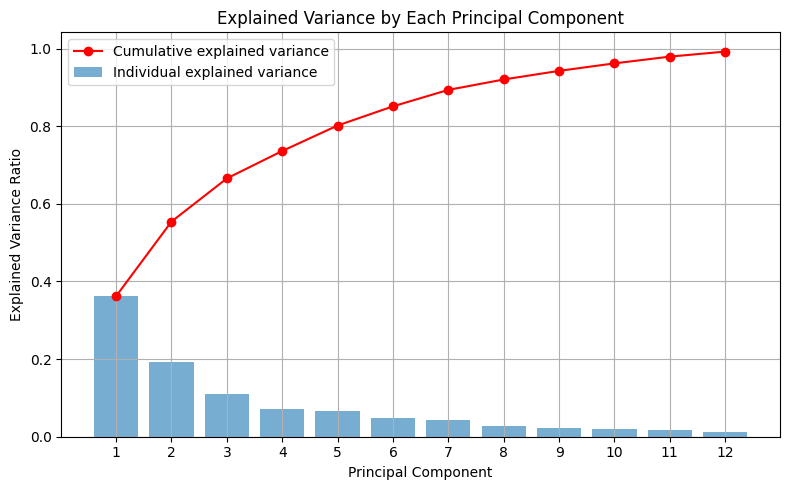

In [26]:

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Individual explained variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='red', label='Cumulative explained variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Each Principal Component')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
model = LogisticRegression()
model.fit(X_train_pca, y_train)

result = model.score(X_test_pca, y_test)
print(result)

0.9722222222222222


In [28]:
from sklearn.svm import SVC

svm_model = SVC(C = 10.0, gamma = 0.1, class_weight = 'balanced', probability = True, random_state = 1)
svm_model.fit(X_train_pca, y_train)
pred_svm = svm_model.predict(X_test_pca)

result = svm_model.score(X_test_pca, y_test)
print(result)

1.0
